<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The bootstrap Function


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import math
import random
from array import *

In [40]:
# Load the customer data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data.shape[0]

14

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

meant=[]

def boostrap_mean(data, size, n_iterations):
	for i in range(n_iterations):
		data2=random.choices(data,k=size)
		mean_val = np.mean(data2)
		meant.append(mean_val)
	meant2=sorted(meant,key=float)
	lower=np.percentile(meant2,2.5)
	upper=np.percentile(meant2,97.5)
	data_mean=np.mean(meant2)
	return data_mean, lower, upper



(0, 100000)

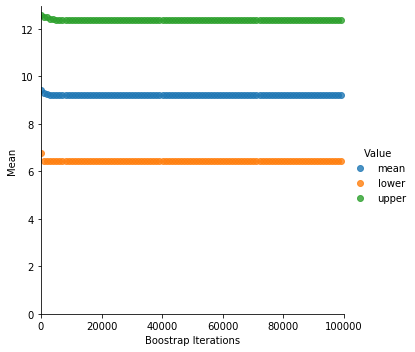

In [42]:

# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
#Create bootstrap function with generalising confidence interval value

meant=[]

def boostrap_mean_ci(sample, sample_size, iterations, ci):
	for i in range(iterations):
		data2=random.choices(data,k=sample_size)
		mean_val = np.mean(data2)
		meant.append(mean_val)
	meant2=sorted(meant,key=float)
	lower=np.percentile(meant2,((100-ci)/2.0))
	upper=np.percentile(meant2,(ci+((100-ci)/2.0)))
	data_mean=np.mean(meant2)
	return data_mean, lower, upper

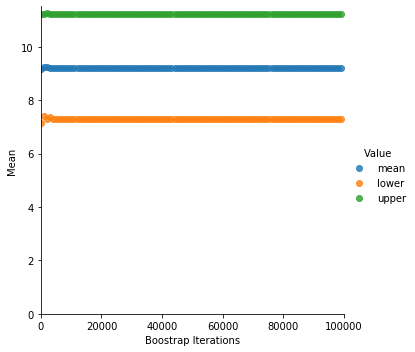

In [0]:
#CreaCallingte bootstrap function with generalising confidence interval as armunet value
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

#Data visualisation with Vehicle  Data

In [15]:
# Load the vehicle data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


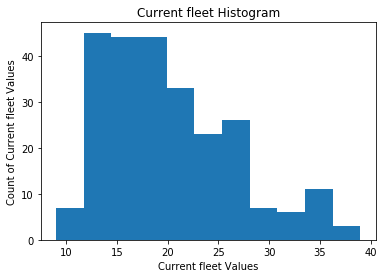

In [0]:
#Histogram for Current Fleet
plt.hist(np.nan_to_num(df['Current fleet']),bins='auto')
plt.title('Current fleet Histogram')
plt.ylabel('Count of Current fleet Values')
plt.xlabel('Current fleet Values')
plt.show()

Scatter plot for Current and New Fleet

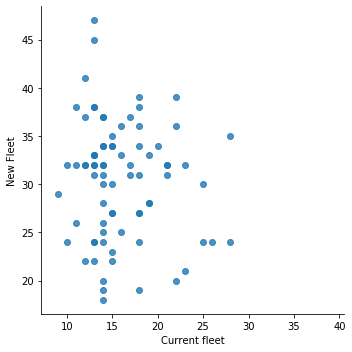

In [0]:
sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False ) # Scatterplot


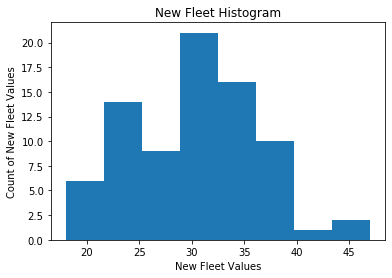

In [0]:
#Histogram for New Fleet
df2=df.dropna()
plt.hist(np.nan_to_num(df2['New Fleet']),bins='auto')
plt.title('New Fleet Histogram')
plt.ylabel('Count of New Fleet Values')
plt.xlabel('New Fleet Values')
plt.show()

In [0]:
#Mean for Current and New Fleet by normal method
Oldfltmean=np.mean(df['Current fleet'])
Newfltmean=np.mean(df['New Fleet'])
print("Old fleet mean :",Oldfltmean,"New fleet Mean :",Newfltmean)

Old fleet mean : 20.14457831325301 New fleet Mean : 30.481012658227847


In [18]:
#Calling Bootsrap function for mean,lower and upper bound for current fleet
boots = []
df=df.dropna()
df=df['Current fleet']
for i in range(100, 100000, 1000):
    boot = boostrap_mean(df, df.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

[[100, 16.088860759493674, 'mean'], [100, 15.237974683544303, 'lower'], [100, 16.81803797468354, 'upper'], [1100, 16.03198312236287, 'mean'], [1100, 15.075949367088608, 'lower'], [1100, 16.9623417721519, 'upper'], [2100, 16.01573072497123, 'mean'], [2100, 15.126582278481013, 'lower'], [2100, 16.93069620253165, 'upper'], [3100, 16.017553401898734, 'mean'], [3100, 15.126582278481013, 'lower'], [3100, 16.924050632911392, 'upper'], [4100, 16.020460518384567, 'mean'], [4100, 15.139240506329115, 'lower'], [4100, 16.949367088607595, 'upper'], [5100, 16.021308016877637, 'mean'], [5100, 15.126582278481013, 'lower'], [5100, 16.949367088607595, 'upper'], [6100, 16.02203231639736, 'mean'], [6100, 15.126582278481013, 'lower'], [6100, 16.962025316455698, 'upper'], [7100, 16.022838431786216, 'mean'], [7100, 15.126582278481013, 'lower'], [7100, 16.962025316455698, 'upper'], [8100, 16.02377928715996, 'mean'], [8100, 15.126582278481013, 'lower'], [8100, 16.962025316455698, 'upper'], [9100, 16.0227820583

In [35]:
#mean for current fleet
currmn=[]
for i in range(len(boots[:])):
  if  boots[i][2]=='mean':
    currmn.append(boots[i][1])
curmean=np.mean(currmn)
print('Mean for Current fleet:', curmean)

Mean for Current fleet: 16.02550532914701


In [0]:
#Calling Bootsrap function for mean,lower and upper bound for New fleet
## Load the vehicle data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
boots2 = []
df=df.dropna()
df=df['New Fleet']

for i in range(100, 100000, 1000):
    boot = boostrap_mean(df, df.shape[0], i)
    boots2.append([i, boot[0], "mean"])
    boots2.append([i, boot[1], "lower"])
    boots2.append([i, boot[2], "upper"])

In [36]:
#mean for New fleet
newmn=[]
for i in range(len(boots2[:])):
  if  boots2[i][2]=='mean':
    newmn.append(boots2[i][1])

newmean=np.mean(newmn)

print('Mean for New fleet:', newmean)


Mean for New fleet: 19.15139435158505


In [37]:
tobs=newmean-curmean
tobs

3.1258890224380416

#Permutaion and P-Value to Check Null Hypothesis

In [39]:
#For Null Hypothesis we suppose Current and New fleet are same.If it is near Zero then it rejects Null Hypothesis and favore New fleet otherwise no difference
## Load the vehicle data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
count=0
concat = np.concatenate((df['Current fleet'], df['New Fleet'].dropna()))
for i in range(2000):
  perm = np.random.permutation(concat)
  pcurr = perm[:int(len(df['Current fleet'].dropna()))]
  pnew = perm[int(len(df['New Fleet'].dropna())):]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("p-value :",p)

p-value : 0.0


#As P-value is 0 We can reject Null Hypothesis and New Fleet is better than current one